In [49]:
from matplotlib import pyplot as plt
import numpy as np
import ipdb

In [127]:

#X will be column vector samples ie m x n w/ m features and n samples
class Perceptron:    
    def __init__(self, netType):
        self.learning_rate = 0.1
        self.costs = []
        self.netType = netType
        self.w = np.random.rand() - 0.5
        self.b = np.random.rand() - 0.5
    
    def feed_forward(self, X, w, b):
        z = w.T.dot(X) + b
        a = self.sigmoid(z)
        return z, a
        
    def sigmoid(self, x):
        return 1 / (1+np.exp(-x))

    def der_sigmoid(self, x):
        return self.sigmoid(x) * (1-self.sigmoid(x))
    
    def mse(self, a, target):
        return np.square(a-target)
    
    def der_mse(self, a, target):
        return 2*(a-target)
    
    def logloss(self, a, target):
        return -(target*np.log(a) + (1-target)*np.log(1-a))
    
    def der_logloss(self, a, target):
        return (a - target)/(a*(1 - a))
        
    def fit(self, X, Y, epochs, learning_rate):
                
        self.w = np.random.randn(X.shape[0], 1)
        self.b = np.random.randn()
        epoch_costs = []
                
        for i in range(epochs):
            batch_cost_sum = 0
            for j in range(X.shape[1]): #doing stochastic 
                
                target = Y[0, j]
                X_curItr = X[:, j]
                
                z, a = self.feed_forward(X_curItr, self.w, self.b)
                dcost_da = 0
                
                if (self.netType == 'classification'):
                    batch_cost_sum += self.logloss(a, target)[0]
                    dcost_da = self.der_logloss(a, target)
                elif (self.netType == 'regression'):
                    batch_cost_sum += self.mse(a, target)[0]
                    dcost_da = self.der_mse(a, target)
                
                da_dz = self.der_sigmoid(z) 
                
                dz_dw = X_curItr
                dz_db = 1
                
                dcost_dz = dcost_da * da_dz
                
                #chain ruling shite
                dcost_dw = dcost_dz * dz_dw
                dcost_db = dcost_dz * dz_db
                
                #updating
                self.w -= learning_rate * dcost_dw.reshape(dcost_dw.shape[0], 1)
                self.b -= learning_rate * dcost_db
            epoch_costs.append(batch_cost_sum/X.shape[1])
        plt.plot(epoch_costs)
    
    def predict(self, X):
        z, a = self.feed_forward(X, self.w, self.b)
        return a

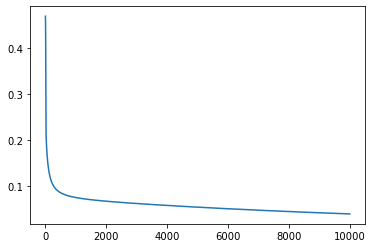

In [115]:
#Flower Problem Training Classification Problem

X_train = np.array([[3, 2, 4, 3, 3.5, 2, 5.5, 1],
                    [1.5, 1, 1.5, 1, 0.5, 0.5, 1, 1]])
y_train = np.array([[1, 0, 1, 0, 1, 0, 1, 0]])

Net = Perceptron('classification')
Net.fit(X_train, y_train, 10000, 0.1)

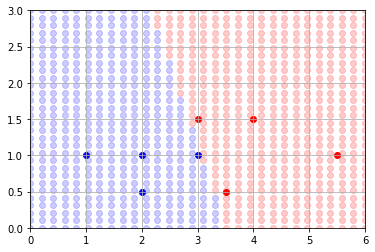

In [118]:
#Visualizing Flower problem

def vis_data():
    plt.axis([0, 6, 0 ,3])
    plt.grid()
    for i in range(len(data)):
        point  = X_train[:, i]
        color = 'r'
        if y_train[0, i] == 0:
            color = 'b'
        plt.scatter(point[0], point[1], c=color)
    
# check out the networks predictions in the x,y plane
for x in np.linspace(0, 6, 30):
    for y in np.linspace(0, 3, 30):
        test = np.array([[x],[y]])
        pred = Net.predict(test)
        c = 'b'
        if pred > .5:
            c = 'r'
        plt.scatter([x],[y],c=c, alpha=.2)

vis_data()

> <ipython-input-127-e1ebc8507bef>(41)fit()
     40 
---> 41         for i in range(epochs):
     42             batch_cost_sum = 0

ipdb> c


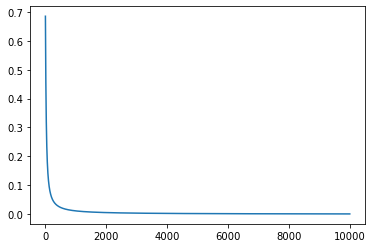

In [128]:
#Quick classification --> first num of row vector is output

training_inputs = np.array([[0, 0, 1], 
                            [1, 1, 1], 
                            [1, 0, 1], 
                            [0, 1, 1]]).T
training_outputs = np.array([[0, 1, 1, 0]]) # transponse to become 4x1 matrix
Net2 = Perceptron('classification')
Net2.fit(training_inputs, training_outputs, 10000, 0.1)

In [132]:
#Res
test = np.array([[1], [1], [0]])
test.shape

a = Net2.predict(test)
print(a)

> <ipython-input-127-e1ebc8507bef>(77)predict()
     76         ipdb.set_trace()
---> 77         z, a = self.feed_forward(X, self.w, self.b)
     78         return a

ipdb> c
[[0.99996787]]


In [121]:
%debug

> <ipython-input-83-82339d1d164b>(11)feed_forward()
      9 
     10     def feed_forward(self, X, w, b):
---> 11         z = w.T.dot(X) + b
     12         a = self.sigmoid(z)
     13         return z, a

ipdb> print(w)
[[6.29960048]
 [2.79662801]]
ipdb> q
